     income    assets      debt  cash_flow  employees  profit_margin  \
0  0.129046  1.480670  0.191334   3.045718   0.044570      -2.165354   
1 -1.621786 -1.004943 -3.247289  -0.538076  -1.780639       0.494827   
2 -0.995168 -1.484321 -0.932939  -1.298973   3.999976      -3.494591   
3 -0.727494 -1.272801 -0.761114  -1.930491   1.095972       0.194644   
4 -0.231794 -3.941699 -0.708895  -3.736174   2.127569      -1.261738   

   vulnerability_status  
0                     2  
1                     1  
2                     0  
3                     1  
4                     2  
Training samples: 210
Testing samples: 90
Explained Variance Ratio: [0.34999    0.21202904]


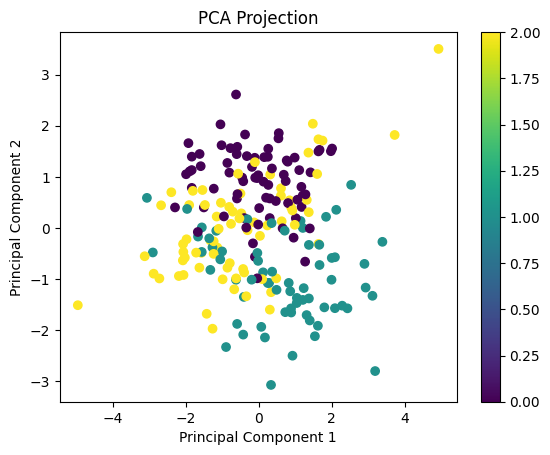

LDA shape: (210, 2)


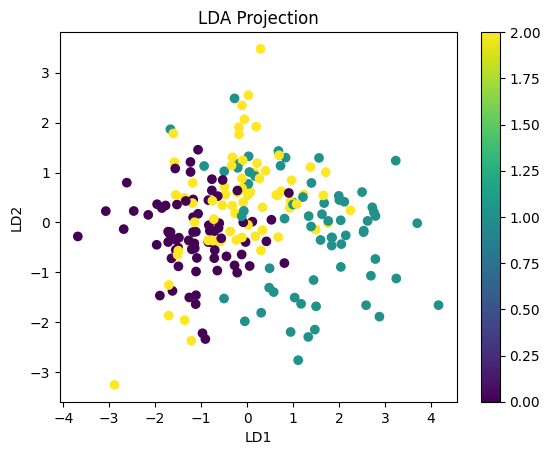

Accuracy (Full Features): 0.6
Accuracy (PCA): 0.6222222222222222
Accuracy (LDA): 0.6111111111111112


In [1]:
# ===============================
# MACHINE EXERCISE 3
# Data Preprocessing: PCA vs LDA
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -------------------------------
# Generate Dataset
# -------------------------------
X, y = make_classification(
    n_samples=300,
    n_features=6,
    n_informative=5,
    n_redundant=1,
    n_classes=3,
    random_state=42
)

columns = ['income', 'assets', 'debt', 'cash_flow', 'employees', 'profit_margin']
df = pd.DataFrame(X, columns=columns)
df['vulnerability_status'] = y

print(df.head())


# -------------------------------
# Train-Test Split (70% training)
# -------------------------------
X = df.drop('vulnerability_status', axis=1)
y = df['vulnerability_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


# -------------------------------
# Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# -------------------------------
# PCA (Unsupervised Reduction)
# -------------------------------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.colorbar()
plt.show()


# -------------------------------
# LDA (Supervised Reduction)
# -------------------------------
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)

print("LDA shape:", X_train_lda.shape)

plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis')
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Projection")
plt.colorbar()
plt.show()


# -------------------------------
# Logistic Regression (Full Features)
# -------------------------------
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train_scaled, y_train)

y_pred_full = model_full.predict(X_test_scaled)
print("Accuracy (Full Features):", accuracy_score(y_test, y_pred_full))


# -------------------------------
# Logistic Regression with PCA
# -------------------------------
X_test_pca = pca.transform(X_test_scaled)

model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)
print("Accuracy (PCA):", accuracy_score(y_test, y_pred_pca))


# -------------------------------
# Logistic Regression with LDA
# -------------------------------
X_test_lda = lda.transform(X_test_scaled)

model_lda = LogisticRegression(max_iter=1000)
model_lda.fit(X_train_lda, y_train)

y_pred_lda = model_lda.predict(X_test_lda)
print("Accuracy (LDA):", accuracy_score(y_test, y_pred_lda))